#Dataset : PLOS API

This dataset is derived from Public Library of Science. These are downloads for the abstrats found on the scientists/physicists : Isaac Newton, Niels Bohr, James Maxwell, Galileo Galeli, Johannes Kepler, Stephen Hawking, Marie Curie, Paul Dirac, Daniel Bernoulli and Leonhard Euler. This was a series of requests and responses top the PLOS API.

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
import spacy
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_score
from string import punctuation
from sklearn import metrics
from scipy.spatial.distance import cdist
nlp = spacy.load('en')
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
#Requests to PLOS API

response1 = requests.get(r'http://api.plos.org/search?q=title:"newton"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response2 = requests.get(r'http://api.plos.org/search?q=title:"bohr"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response3 = requests.get(r'http://api.plos.org/search?q=title:"maxwell"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response4 = requests.get(r'http://api.plos.org/search?q=title:"galileo"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response5 = requests.get(r'http://api.plos.org/search?q=title:"kepler"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response6 = requests.get(r'http://api.plos.org/search?q=title:"hawking"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response7 = requests.get(r'http://api.plos.org/search?q=title:"curie"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response8 = requests.get(r'http://api.plos.org/search?q=title:"dirac"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response9 = requests.get(r'http://api.plos.org/search?q=title:"bernoulli"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')
response10 = requests.get(r'http://api.plos.org/search?q=title:"euler"&fl=abstract&wt=json&api_key=7ujScsFm2osdMw6ozx4g')

In [0]:
#Response we got in JSON stores as raw format
newton_raw = response1.json()
bohr_raw = response2.json()
maxwell_raw = response3.json()
galileo_raw = response4.json()
kepler_raw = response5.json()
hawking_raw = response6.json()
curie_raw = response7.json()
dirac_raw = response8.json()
bernoulli_raw = response9.json()
euler_raw = response10.json()

In [4]:
#Remove all \\ from the call
newton = ''
for article in newton_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    newton = newton + art

print("newton: ", newton[0:200])    

bohr = ''
for article in bohr_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    bohr = bohr + art

print("bohr: ", bohr[0:200])    

maxwell = ''
for article in maxwell_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    maxwell = maxwell + art

print("maxwell: ", maxwell[0:200])    

galileo = ''
for article in galileo_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    galileo = galileo + art

print("galileo: ", galileo[0:200])    

kepler = ''
for article in kepler_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    kepler = kepler + art

print("kepler: ", kepler[0:200])    

hawking = ''
for article in hawking_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    hawking = hawking + art

print("hawking: ", hawking[0:200])    

curie = ''
for article in curie_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    curie = curie + art

print("curie: ", curie[0:200])    

dirac = ''
for article in dirac_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    dirac = dirac + art

print("dirac: ", dirac[0:200])    

bernoulli = ''
for article in bernoulli_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    bernoulli = bernoulli + art

print("bernoulli: ", bernoulli[0:200])    

euler = ''
for article in euler_raw['response']['docs']:
    art = re.sub(r'[\[\]]','', str(article['abstract']))
    euler = euler + art

print("euler: ", euler[0:200])    

newton:  '\nThis paper presents an in silico optimization method of metabolic pathway production. The metabolic pathway can be represented by a mathematical model known as the generalized mass action model, wh
bohr:  'Background: Carbon dioxide (CO2) therapy refers to the transcutaneous administration of CO2 for therapeutic purposes. This effect has been explained by an increase in the pressure of O2 in tissues kn
maxwell:  '\nThe paper proposes a fractional generalization of the Maxwell and Kelvin-Voigt rheological models for a description of dynamic behavior of biopolymer materials. It was found that the rheological mo
galileo:  "Background: Transposable elements (TEs) are responsible for the generation of chromosomal inversions in several groups of organisms. However, in Drosophila and other Dipterans, where inversions are a
kepler:  '\nThe Ligon-Schaaf regularization (LS mapping) was introduced in 1976 and has been used several times. However, we are not aware of any direct usage o

In [0]:
#Function for cleaning the text
def text_cleaner(text):
    text = re.sub(r'--', ' ', text)
    text = re.sub(r'[\']', '', text)
    text = re.sub(r'[\\]', '', text)
    text = re.sub(r'\d', '', text)
    return text

In [0]:
newton_clean = text_cleaner(newton)
bohr_clean = text_cleaner(bohr)
maxwell_clean = text_cleaner(maxwell)
galileo_clean = text_cleaner(galileo)
kepler_clean = text_cleaner(kepler)
hawking_clean = text_cleaner(hawking)
curie_clean = text_cleaner(curie)
dirac_clean = text_cleaner(dirac)
bernoulli_clean = text_cleaner(bernoulli)
euler_clean = text_cleaner(euler)

In [7]:
#Word count for each of the documents.
print('newton :',len(newton_clean))
print('bohr :',len(bohr_clean))
print('maxwell :',len(maxwell_clean))
print('galileo :',len(galileo_clean))
print('kepler :',len(kepler_clean))
print('hawking :',len(hawking_clean))
print('curie :',len(curie_clean))
print('dirac :',len(dirac_clean))
print('bernoulli :',len(bernoulli_clean))
print('euler :',len(euler_clean))

newton : 5722
bohr : 1875
maxwell : 11439
galileo : 3298
kepler : 4028
hawking : 20919
curie : 1646
dirac : 3074
bernoulli : 4269
euler : 5865


In [0]:
#Running nlp on each of the documents
newton_doc = nlp(newton_clean)
bohr_doc = nlp(bohr_clean)
maxwell_doc = nlp(maxwell_clean)
galileo_doc = nlp(galileo_clean)
kepler_doc = nlp(kepler_clean)
hawking_doc = nlp(hawking_clean)
curie_doc = nlp(curie_clean)
dirac_doc = nlp(dirac_clean)
bernoulli_doc = nlp(bernoulli_clean)
euler_doc = nlp(euler_clean)

In [9]:
#Converting the documents into sentences
newton_sents = [[sent, 'Newton'] for sent in newton_doc.sents]
bohr_sents = [[sent, 'Bohr'] for sent in bohr_doc.sents]
maxwell_sents = [[sent, 'Maxwell'] for sent in maxwell_doc.sents]
galileo_sents = [[sent, 'Galileo '] for sent in galileo_doc.sents]
kepler_sents = [[sent, 'Kepler'] for sent in kepler_doc.sents]
hawking_sents = [[sent, 'Hawking'] for sent in hawking_doc.sents]
curie_sents = [[sent, 'Curie'] for sent in curie_doc.sents]
dirac_sents = [[sent, 'Dirac'] for sent in dirac_doc.sents]
bernoulli_sents = [[sent, 'Bernoulli'] for sent in bernoulli_doc.sents]
euler_sents = [[sent, 'Euler'] for sent in euler_doc.sents]

sentences = pd.DataFrame(newton_sents + bohr_sents + maxwell_sents + galileo_sents + kepler_sents + hawking_sents + curie_sents + dirac_sents + bernoulli_sents + euler_sents)
print(len(sentences))

410


In [10]:
sentences.head()

,0,1
0,"(nThis, paper, presents, an, in, silico, optim...",Newton
1,"(The, metabolic, pathway, can, be, represented...",Newton
2,"(The, optimization, process, becomes, difficul...",Newton
3,"(To, deal, with, this, situation, ,, this, pap...",Newton
4,"(The, NCGA, used, Newton, method, in, dealing,...",Newton


In [0]:
#Converting to Dataframe
df = pd.DataFrame()
df['text_sentence'] = sentences[0]
df['text_source'] = sentences[1]
df['sent_length'] = df.text_sentence.map(lambda x: len(x))

In [0]:
#Find the number of punctuations, adverbs, verbs and nouns
sentences = df.text_sentence

punc_count = []
for sent in sentences:
    punc = 0
    for token in sent:
        if token.pos_ == 'PUNCT':
            punc +=1
    punc_count.append(punc)

df['punc_count'] = punc_count

adv_count = []
for sent in sentences:
    advs = 0
    for token in sent:
        if token.pos_ == 'ADV':
            advs +=1
    adv_count.append(advs)

df['adv_count'] = adv_count

verb_count = []
for sent in sentences:
    verb = 0
    for token in sent:
        if token.pos_ == 'VERB':
            verb +=1
    verb_count.append(verb)

df['verb_count'] = verb_count

noun_count = []
for sent in sentences:
    noun = 0
    for token in sent:
        if token.pos_ == 'NOUN':
            noun +=1
    noun_count.append(noun)

df['noun_count'] = noun_count


# **Exploratory Data Analysis**

Let us see how our data looks like

In [13]:
df.head()

,text_sentence,text_source,sent_length,punc_count,adv_count,verb_count,noun_count
0,"(nThis, paper, presents, an, in, silico, optim...",Newton,13,1,0,1,6
1,"(The, metabolic, pathway, can, be, represented...",Newton,27,2,0,6,6
2,"(The, optimization, process, becomes, difficul...",Newton,21,1,1,3,6
3,"(To, deal, with, this, situation, ,, this, pap...",Newton,25,5,1,2,5
4,"(The, NCGA, used, Newton, method, in, dealing,...",Newton,24,3,1,3,5


In [14]:
df.describe()

,sent_length,punc_count,adv_count,verb_count,noun_count
count,410.000000,410.000000,410.000000,410.000000,410.000000
mean,25.868293,3.114634,0.807317,3.439024,7.126829
std,15.268332,2.618167,1.064862,2.424899,4.694429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,0.000000,2.000000,4.000000
50%,23.000000,2.000000,0.500000,3.000000,6.000000
75%,32.000000,4.000000,1.000000,5.000000,9.000000
max,90.000000,21.000000,6.000000,14.000000,30.000000


Looks like there is no missing data. So let us see the distribution of attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa85dcaf518>,
      dtype=object)

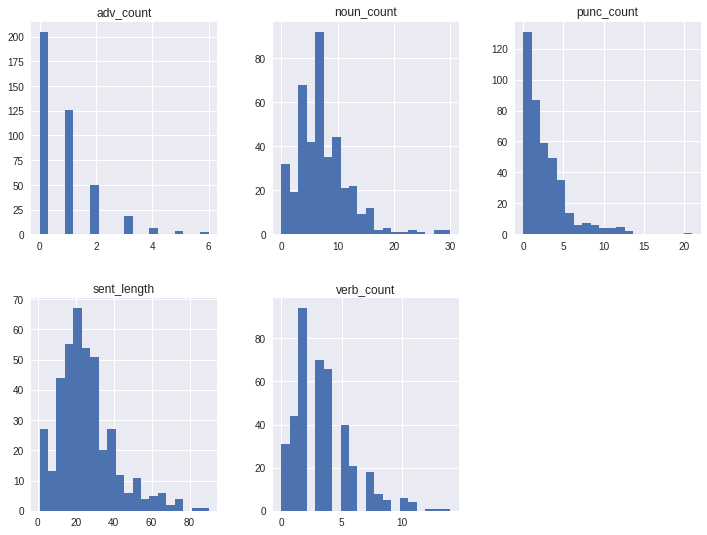

In [15]:
df.hist(bins=20, figsize=(12,9), layout=(2,3))

The attributes are all skewed in one way or the other. Let us see how the correlations look like

In [16]:
df.columns

Index(['text_sentence', 'text_source', 'sent_length', 'punc_count',
       'adv_count', 'verb_count', 'noun_count'],
      dtype='object')

             sent_length  punc_count  adv_count  verb_count  noun_count
sent_length     1.000000    0.722100   0.499203    0.755451    0.907159
punc_count      0.722100    1.000000   0.393810    0.386022    0.619471
adv_count       0.499203    0.393810   1.000000    0.478815    0.320861
verb_count      0.755451    0.386022   0.478815    1.000000    0.589831
noun_count      0.907159    0.619471   0.320861    0.589831    1.000000


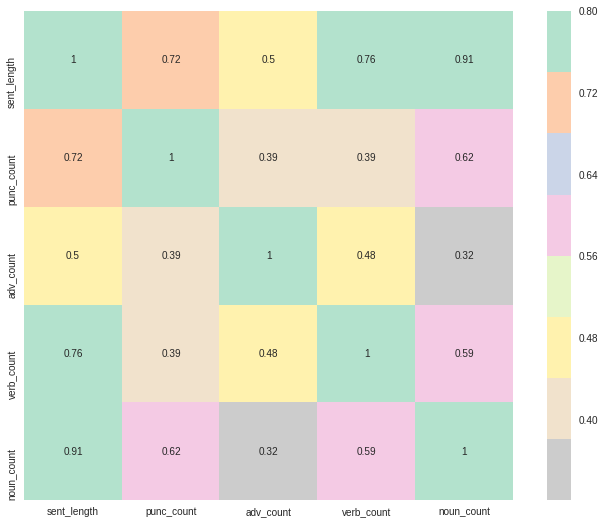

In [17]:
X = df.drop(['text_sentence', 'text_source'], axis = 1)

# Make the correlation matrix.
corrmat = X.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap = 'Pastel2_r')
plt.show()

Since sent_lenght and noun_count are highly correlated with all other attributes, let us consider only the attributes punc_count, adv_count and verb_count for further unsupervised and for supervised modelling. Let us see how each of these 3 attribute relate to other using Pair grid

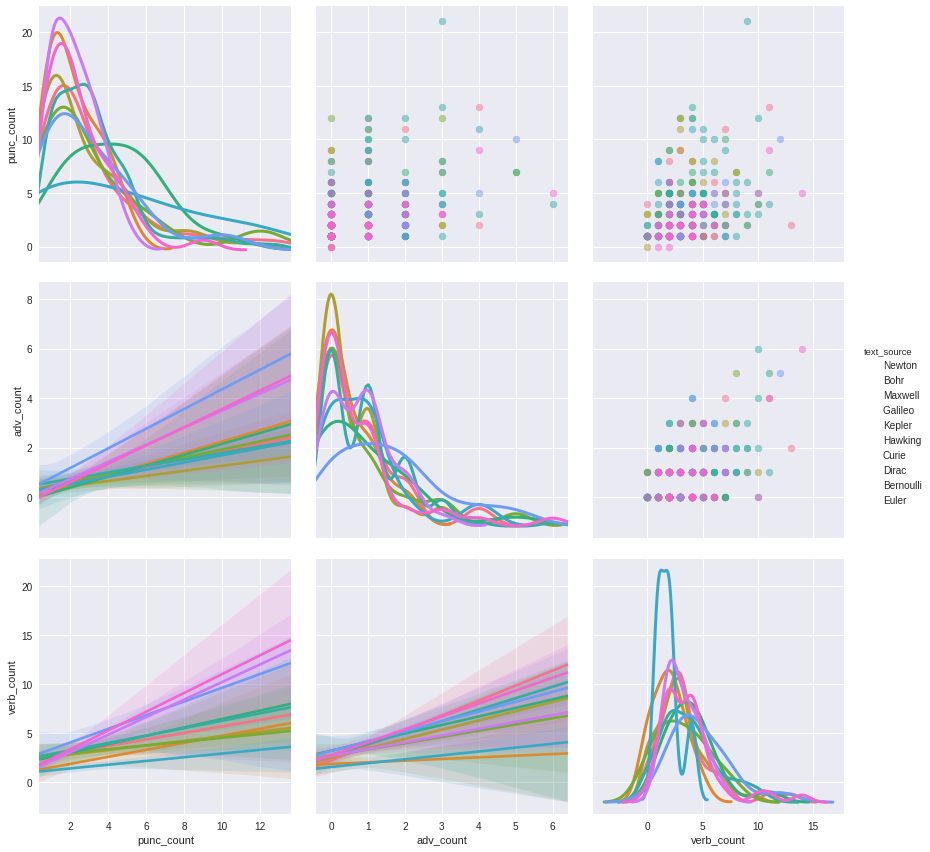

In [18]:
X = df.drop(['text_sentence','sent_length','noun_count'], axis = 1)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(X.dropna(), hue='text_source', size= 4, diag_sharey=False)

# Scatterplot.
g = g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing the linear relationship of the two variables.
g = g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.
g = g.map_diag(sns.kdeplot, lw=3)

g = g.add_legend()

plt.show()

###K-Means Clustering

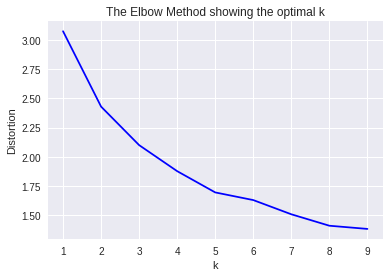

In [19]:
# clustering dataset
# determine k using elbow method

X = df.loc[:,['punc_count','adv_count','verb_count']]
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
#Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Looks like 5 is the optimal number of clusters seeing the elow formation at 5

In [20]:
X = df.loc[:,['punc_count','adv_count','verb_count']]

X_norm = normalize(X)

pca = PCA(n_components = None)
# Reduce it to two components.
X_pca = pca.fit_transform(X_norm)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.75273089, 0.19891482, 0.04835429])

####KMeans with 4 Clusters

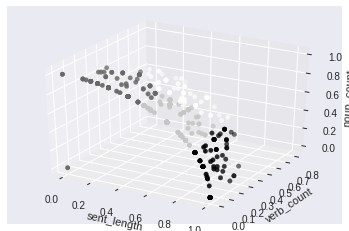

In [21]:
from mpl_toolkits.mplot3d import Axes3D

X = df.loc[:,['punc_count','adv_count','verb_count']]

X_norm = normalize(X)

y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_norm)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_norm[:, [0]], X_norm[:, [1]], X_norm[:,[2]], c=y_pred)

ax.set_xlabel('sent_length')
ax.set_ylabel('verb_count')
ax.set_zlabel('noun_count')

plt.show()

Our clusters are pretty good in terms of shape and distribution

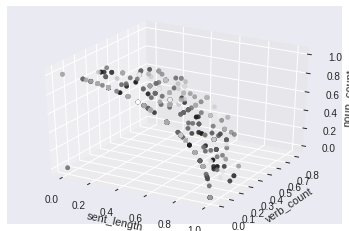

In [22]:
X = df.loc[:,['punc_count','adv_count','verb_count']]

X_norm = normalize(X)

y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_norm)

# Change the text source into numbers to be used color values for graph

df['text_codes'] = pd.Categorical(df['text_source'])
df['text_codes'] = df.text_codes.cat.codes

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_norm[:, [0]], X_norm[:, [1]], X_norm[:,[2]], c=df.text_codes)

ax.set_xlabel('sent_length')
ax.set_ylabel('verb_count')
ax.set_zlabel('noun_count')

plt.show()

Changing Source as categorical data produces totally different result.

In [0]:
cluster_df = df.copy()
cluster_df['cluster'] = y_pred

In [24]:
#Find the elements in every cluster
for i in range(cluster_df['cluster'].nunique()):
    cluster = cluster_df[cluster_df['cluster']== i]
    print('Cluster ', i, '\n', Counter(list(cluster['text_source'])),'\n')

Cluster  0 
 Counter({'Hawking': 23, 'Bernoulli': 14, 'Euler': 12, 'Maxwell': 9, 'Galileo ': 7, 'Dirac': 6, 'Newton': 5, 'Bohr': 5, 'Kepler': 2, 'Curie': 2}) 

Cluster  1 
 Counter({'Hawking': 49, 'Maxwell': 18, 'Newton': 12, 'Euler': 10, 'Kepler': 7, 'Bernoulli': 7, 'Bohr': 4, 'Dirac': 4, 'Galileo ': 3, 'Curie': 1}) 

Cluster  2 
 Counter({'Hawking': 30, 'Maxwell': 29, 'Euler': 16, 'Newton': 11, 'Bernoulli': 10, 'Galileo ': 7, 'Dirac': 5, 'Kepler': 4, 'Bohr': 3, 'Curie': 2}) 

Cluster  3 
 Counter({'Maxwell': 27, 'Hawking': 26, 'Newton': 9, 'Bohr': 7, 'Galileo ': 7, 'Curie': 7, 'Kepler': 5, 'Euler': 4, 'Bernoulli': 1}) 



In [25]:
#Sample sentences in Cluster 0
cluster0 = cluster_df.loc[cluster_df['cluster']== 0, ['text_sentence','text_source']]
for i in cluster0.index[:10]:
    print(cluster0.loc[i,'text_sentence'], '\n')

A number of experimental data may lead to complicated real-time curves that do not fit well to the kinetic model. 

Compared with the results from the Newton iteration algorithm, it shows that the Marquardt algorithm does not only reduce the dependence of the initial value to avoid the divergence but also can greatly reduce the iterative regression times. 

() also demonstrated that most subjects exhibited significantly strong stimulus-locked SSMVEP responses. 

However, efficiency may be lost due to the need for a large number of iterations of the EM algorithm. 

MC Broydens method required the largest number of MC samples with our small data and did not give standard errors for the parameters directly. 

However, there have been no reports investigating the oxygen dissociation of haemoglobin (Hb) during transcutaneous application of CO in vivo. 

The intracellular pH of the triceps surae muscle decreased significantly  min. 

The NIRS data show the oxy-Hb concentration decreased sign

In [26]:
cluster_df.loc[cluster_df['cluster']== 0, ['punc_count','adv_count','verb_count']].describe()

,punc_count,adv_count,verb_count
count,85.000000,85.000000,85.000000
mean,2.694118,2.023529,3.811765
std,1.851791,1.174901,2.670358
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000
50%,2.000000,2.000000,3.000000
75%,4.000000,2.000000,5.000000
max,10.000000,6.000000,14.000000


In [27]:
cluster_df.loc[cluster_df['cluster']== 1, ['punc_count','adv_count','verb_count']].describe()

,punc_count,adv_count,verb_count
count,115.000000,115.000000,115.000000
mean,3.782609,0.469565,3.643478
std,2.304772,0.729356,1.974359
min,1.000000,0.000000,1.000000
25%,2.000000,0.000000,2.000000
50%,3.000000,0.000000,3.000000
75%,5.000000,1.000000,5.000000
max,13.000000,4.000000,11.000000


In [28]:
cluster_df.loc[cluster_df['cluster']== 2, ['punc_count','adv_count','verb_count']].describe()

,punc_count,adv_count,verb_count
count,117.000000,117.000000,117.000000
mean,1.658120,0.367521,4.529915
std,1.001399,0.651236,2.325172
min,0.000000,0.000000,1.000000
25%,1.000000,0.000000,3.000000
50%,1.000000,0.000000,4.000000
75%,2.000000,1.000000,6.000000
max,5.000000,4.000000,13.000000


In [29]:
cluster_df.loc[cluster_df['cluster']== 3, ['punc_count','adv_count','verb_count']].describe()

,punc_count,adv_count,verb_count
count,93.000000,93.000000,93.000000
mean,4.505376,0.666667,1.473118
std,3.757959,0.900885,1.543510
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000
75%,6.000000,1.000000,2.000000
max,21.000000,4.000000,9.000000


Clusters 0 and 2 are similar and 1 and 3 are also similar

In [30]:
#Sample sentences

cluster2 = cluster_df.loc[cluster_df['cluster']== 2,  ['text_sentence','text_source']]
for i in cluster2.index[:10]:
    print(cluster2.loc[i,'text_sentence'], '\n')

The metabolic pathway can be represented by a mathematical model known as the generalized mass action model, which leads to a complex nonlinear equations system. 

The optimization process becomes difficult when steady state and the constraints of the components in the metabolic pathway are involved. 

The proposed method was experimentally applied on the benchmark metabolic pathways, and the results showed that the NCGA achieved better results compared to the existing methods.nnKinetic analysis of biomolecular interactions are powerfully used to quantify the binding kinetic constants for the determination of a complex formed or dissociated within a given time span. 

This paper presented an analysis approach of biomolecular interactions established by utilizing the Marquardt algorithm. 

This algorithm was intensively considered to implement in the homemade bioanalyzer to perform the nonlinear curve-fitting of the association and disassociation process of the receptor to ligand. 

The

In [31]:
cluster3 = cluster_df.loc[cluster_df['cluster']== 3,  ['text_sentence','text_source']]
for i in cluster3.index[:5]:
    print(cluster3.loc[i,'text_sentence'], '\n')

To deal with this situation, this paper presents an in silico optimization method, namely the Newton Cooperative Genetic Algorithm (NCGA). 

Moreover, both the association rate and dissociation rate of the receptor to ligand are the substantial parameters for the study of signal transmission between cells. 

The association and dissociation rate constants, ka, kd and the affinity parameters for the biomolecular interaction, KA, KD, were experimentally obtained .× mL·g-·s-, . 

s-, 

.× mL·g- and .×- g·mL-, respectively from the injection of the HBsAg solution with the concentration of ng·mL-. 



In [32]:
cluster1 = cluster_df.loc[cluster_df['cluster']== 1,  ['text_sentence','text_source']]
for i in cluster1.index[:5]:
    print(cluster1.loc[i,'text_sentence'], '\n')

nThis paper presents an in silico optimization method of metabolic pathway production. 

The NCGA used Newton method in dealing with the metabolic pathway, and then integrated genetic algorithm and cooperative co-evolutionary algorithm. 

Surface plasmon resonance biosensors provide an essential approach in the analysis of the biomolecular interactions including the interaction process of antigen-antibody and receptors-ligand. 

The binding affinity of the antibody to the antigen (or the receptor to the ligand) reflects the biological activities of the control antibodies (or receptors) and the corresponding immune signal responses in the pathologic process. 

In this study, we utilize a special visual stimulation protocol, called motion reversal, to present a novel steady-state motion visual evoked potential (SSMVEP)-based BCI paradigm that relied on human perception of motions oscillated in two opposite directions. 



#Supervised Modelling

Let us use our 3 least correalted features to model. We will use 80-20 train and test ratio for our modeling.



In [0]:
Y = df['text_source']

X = df.loc[:,['punc_count','adv_count','verb_count']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [34]:
rfc = ensemble.RandomForestClassifier()

rfc.fit(X_train, Y_train)

print('Training set score:', rfc.score(X_train, Y_train))
print('Testing set score:', rfc.score(X_test, Y_test))

Training set score: 0.5762195121951219
Testing set score: 0.21951219512195122


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


That was really bad.

####Using Logistic Regression

In [35]:
lr = LogisticRegression()

lr.fit(X_train, Y_train)

print('Training set score:', lr.score(X_train, Y_train))
print('Testing set score:', lr.score(X_test, Y_test))

Training set score: 0.32926829268292684
Testing set score: 0.2682926829268293


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [36]:
clf = ensemble.GradientBoostingClassifier()

clf.fit(X_train, Y_train)

print('Training set score:', clf.score(X_train, Y_train))
print('Testing set score:', clf.score(X_test, Y_test))

Training set score: 0.5548780487804879
Testing set score: 0.2073170731707317


In [37]:
svm = SVC(kernel = 'linear')

svm.fit(X_train, Y_train)

print('Training set score:', svm.score(X_train, Y_train))
print('Training set score:', svm.score(X_test, Y_test))

Training set score: 0.3231707317073171
Training set score: 0.2682926829268293


All were bad, let us now try Bag of words and model using the features that we get from this method.

##Bag of Words method

In [0]:
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    return allwords

In [0]:
set_bag = []

for i, text in enumerate(df['text_sentence']):
    allwords = bag_of_words(text)
    set_bag.extend(allwords)
    
set_bag = set(set_bag)

In [0]:
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df_sent = pd.DataFrame(columns=common_words)
    df_sent['text_sentence'] = sentences['text_sentence']
    df_sent['text_source'] = sentences['text_source']
    df_sent.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df_sent['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        # Populate the row with word counts.
        for word in words:
            df_sent.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df_sent

In [41]:
bow_df = bow_features(df, set_bag)

Processing row 0


In [42]:
bow_df.shape

(410, 1914)

Good, now we have many features to model with. Let us do a 75-25 train test split for modelling

In [0]:
y = bow_df['text_source']
x = np.array(bow_df.drop(['text_sentence','text_source'], 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

####Using Random Forest

In [44]:
rfc = ensemble.RandomForestClassifier()

rfc.fit(x_train, y_train)

print('Training set score:', rfc.score(x_train, y_train))
print('Training set score:', rfc.score(x_test, y_test))

Training set score: 0.9348534201954397
Training set score: 0.6116504854368932


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [45]:
cross_val_score(rfc, x, y, cv=5)

array([0.43023256, 0.63953488, 0.51219512, 0.29113924, 0.53246753])

Not bad, our scores increased from 20% using just 3 features to 50% using the new ones

####Using Logistic Regression

In [46]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

print('Training set score:', lr.score(x_train, y_train))
print('Training set score:', lr.score(x_test, y_test))

Training set score: 0.9413680781758957
Training set score: 0.7184466019417476


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [47]:
cross_val_score(lr, x, y, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

array([0.54651163, 0.70930233, 0.62195122, 0.36708861, 0.61038961])

Nice, we are well above 60% on average. 

####Using Gradient Boost

In [48]:
clf = ensemble.GradientBoostingClassifier()
clf.fit(x_train, y_train)

print('Training set score:', clf.score(x_train, y_train))
print('Training set score:', clf.score(x_test, y_test))

Training set score: 0.9446254071661238
Training set score: 0.6407766990291263


In [49]:
cross_val_score(clf, x, y, cv=5)

array([0.46511628, 0.63953488, 0.54878049, 0.44303797, 0.58441558])

We came back to 55% on average using this model

####Using SVC

In [50]:
svm = SVC(kernel = 'linear')
svm.fit(x_train, y_train)

print('Training set score:', svm.score(x_train, y_train))
print('Training set score:', svm.score(x_test, y_test))

Training set score: 0.9446254071661238
Training set score: 0.6310679611650486


In [51]:
cross_val_score(svm, x, y, cv=5)

array([0.45348837, 0.63953488, 0.59756098, 0.3164557 , 0.57142857])

Similar to Gradient Boost, SVC also gives 55% on average. Let us try clustering this dataset after creating new features

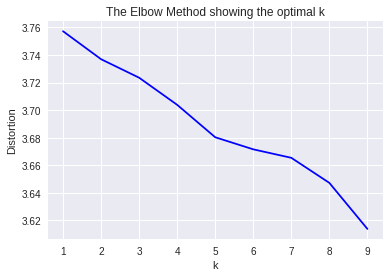

In [52]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Optimal k is somewhere between 4 and 5. Let us try to find how many clusters explain variance using PCA

In [53]:
x_norm = normalize(x)

pca = PCA(n_components = None)
# Reduce it to two components.
x_pca = pca.fit_transform(x_norm)

explained_variance = pca.explained_variance_ratio_

explained_variance[:5]

array([0.01673079, 0.01591437, 0.01448454, 0.01370569, 0.01245453])

Now, we can just take first 4 and try our K Means clustering

In [0]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(x)

In [0]:
bow_clusters_df = bow_df.copy()

In [0]:
bow_clusters_df['clusters'] = y_pred

In [57]:
for i in range(bow_clusters_df['clusters'].nunique()):
    cluster = bow_clusters_df[bow_clusters_df['clusters']== i]
    print('Cluster ', i, '\n', Counter(list(cluster['text_source'])),'\n')

Cluster  0 
 Counter({'Hawking': 111, 'Maxwell': 83, 'Euler': 40, 'Newton': 37, 'Bernoulli': 31, 'Galileo ': 24, 'Bohr': 19, 'Kepler': 18, 'Dirac': 15, 'Curie': 12}) 

Cluster  1 
 Counter({'Bernoulli': 1, 'Euler': 1}) 

Cluster  2 
 Counter({'Euler': 1}) 

Cluster  3 
 Counter({'Hawking': 17}) 



Cluster0 has majority of elements

In [58]:
bow_cluster0 = bow_clusters_df.loc[bow_clusters_df['clusters']== 0, ['text_sentence','text_source']]
for i in bow_cluster0.index[:5]:
    print(bow_cluster0.loc[i,'text_sentence'], '\n')

nThis paper presents an in silico optimization method of metabolic pathway production. 

The metabolic pathway can be represented by a mathematical model known as the generalized mass action model, which leads to a complex nonlinear equations system. 

The optimization process becomes difficult when steady state and the constraints of the components in the metabolic pathway are involved. 

To deal with this situation, this paper presents an in silico optimization method, namely the Newton Cooperative Genetic Algorithm (NCGA). 

The NCGA used Newton method in dealing with the metabolic pathway, and then integrated genetic algorithm and cooperative co-evolutionary algorithm. 



In [59]:
bow_cluster1 = bow_clusters_df.loc[bow_clusters_df['clusters']== 1, ['text_sentence','text_source']]
for i in bow_cluster1.index[:5]:
    print(bow_cluster1.loc[i,'text_sentence'], '\n')

nThe linear theory of thermoelastic damping (TED) has been extensively developed over the past eight decades, but relatively little is known about the different types of nonlinearities that are associated with this fundamental mechanism of material damping. 

Experimental results demonstrate the effectiveness of the proposed model in visual improvement, as well as an increase in the peak signal-to-noise ratio, compared to the PDE-based methods.nnThe linear theory of thermoelastic damping (TED) has been extensively developed over the past eight decades, but relatively little is known about the different types of nonlinearities that are associated with this fundamental mechanism of material damping. 



In [60]:
bow_cluster2 = bow_clusters_df.loc[bow_clusters_df['clusters']== 2, ['text_sentence','text_source']]
for i in bow_cluster2.index[:5]:
    print(bow_cluster2.loc[i,'text_sentence'], '\n')

Our study demonstrates that, the new Eulers formula provides a theoretical framework for the stereo-chemistry of DNA polyhedra, which can characterize enzymatic transformations of DNA and be used to characterize and design novel cages with higher genus.n      "nMinimization functionals related to Euler’s elastica energy has a broad range of applications in computer vision and image processing. 



In [61]:
bow_cluster3 = bow_clusters_df.loc[bow_clusters_df['clusters']== 3, ['text_sentence','text_source']]
for i in bow_cluster3.index[:5]:
    print(bow_cluster3.loc[i,'text_sentence'], '\n')

Their efficient hunting involves the use of specialised foraging techniques which employ brief short-distance pursuit and/or rapid neck extension to capture prey that is visually detected or flushed only at short range. 

We studied visual field configuration, degree of eye movement, and orbit orientation in three diurnal raptors belonging to the Accipitridae and Falconidae families. 

We found inter-specific variation in visual field configuration and degree of eye movement, but not in orbit orientation. 

∼°), but intermediate degree of eye movement (∼°), which underscores the importance of lateral vision rather than binocular vision to scan for distant prey in open areas. 

Coopers Hawks have relatively wide binocular fields (∼°), small blind areas (∼°), and high degree of eye movement (∼°), which may increase visual coverage and enhance prey detection in closed habitats. 



Let us try mean shift now

In [62]:
bandwidth = estimate_bandwidth(x, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(x)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 5


In [0]:
bow_mean_shift_clusters = bow_df.copy()

In [0]:
bow_mean_shift_clusters['clusters'] = labels

In [65]:
for i in range(bow_mean_shift_clusters['clusters'].nunique()):
    cluster = bow_mean_shift_clusters[bow_mean_shift_clusters['clusters']== i]
    print('Cluster ', i, '\n', Counter(list(cluster['text_source'])),'\n')

Cluster  0 
 Counter({'Hawking': 127, 'Maxwell': 82, 'Euler': 42, 'Newton': 35, 'Bernoulli': 32, 'Galileo ': 23, 'Bohr': 19, 'Kepler': 18, 'Dirac': 15, 'Curie': 12}) 

Cluster  1 
 Counter({'Maxwell': 1}) 

Cluster  2 
 Counter({'Newton': 2}) 

Cluster  3 
 Counter({'Hawking': 1}) 

Cluster  4 
 Counter({'Galileo ': 1}) 



Even though the number of clusters increased, Cluster 0 still has most of elements

In [66]:
mean_shift_cluster1 = bow_mean_shift_clusters.loc[bow_mean_shift_clusters['clusters']== 1, ['text_sentence','text_source']]
for i in mean_shift_cluster1.index:
    print(mean_shift_cluster1.loc[i,'text_sentence'], '\n')

The momentum, energy and nanoparticle concentration profiles are examined with respect to the involved rheological parameters namely the Deborah number, source/sink parameter, the Brownian motion parameters, thermophoresis parameter and Biot number. 



In [67]:
mean_shift_cluster2 = bow_mean_shift_clusters.loc[bow_mean_shift_clusters['clusters']== 0, ['text_sentence','text_source']]
for i in mean_shift_cluster2.index[:5]:
    print(mean_shift_cluster2.loc[i,'text_sentence'], '\n')

nThis paper presents an in silico optimization method of metabolic pathway production. 

The metabolic pathway can be represented by a mathematical model known as the generalized mass action model, which leads to a complex nonlinear equations system. 

The optimization process becomes difficult when steady state and the constraints of the components in the metabolic pathway are involved. 

To deal with this situation, this paper presents an in silico optimization method, namely the Newton Cooperative Genetic Algorithm (NCGA). 

The NCGA used Newton method in dealing with the metabolic pathway, and then integrated genetic algorithm and cooperative co-evolutionary algorithm. 



# **TF_IDF**

Now let us try TF-IDF and continue our modeling

In [0]:
# create a document-term matrix using TF-IDF
text_in_sentences = ""
text_in_sentences=[text_in_sentences]
text_in_sentences = newton_clean + bohr_clean + maxwell_clean + galileo_clean + kepler_clean + hawking_clean + curie_clean + dirac_clean + bernoulli_clean + euler_clean


In [69]:
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform([text_in_sentences])
features = vect.get_feature_names()
dtm.shape

(1, 2159)

In [0]:
idf = vect.idf_

In [0]:
idf_dict = dict(zip(vect.get_feature_names(), idf))

In [0]:
idf_words = list(idf_dict.keys())

In [0]:
def idf_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences['text_sentence']
    df['text_source'] = sentences['text_source']
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += idf_dict[word]
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df

In [74]:
tfidf_df = idf_features(df, idf_words)

Processing row 0


In [75]:
tfidf_df.head()

,able,absolute,absorption,abstract,abundance,abundant,access,accessible,accipiter,accipitridae,...,yielding,young,zero,zinc,zone,δtime,δwt,δwtua,text_sentence,text_source
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(nThis, paper, presents, an, in, silico, optim...",Newton
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(The, metabolic, pathway, can, be, represented...",Newton
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(The, optimization, process, becomes, difficul...",Newton
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(To, deal, with, this, situation, ,, this, pap...",Newton
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(The, NCGA, used, Newton, method, in, dealing,...",Newton


We now have more features than Bag of Words method. We will now split data 80-20 ratio to perform modelling

In [0]:
y_idf = tfidf_df['text_source']
x_idf = np.array(tfidf_df.drop(['text_sentence','text_source'], 1))

x_idf_train, x_idf_test, y_idf_train, y_idf_test = train_test_split(x_idf, y_idf, test_size=0.20, random_state=42)

####Using Random Forest

In [77]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(x_idf_train, y_idf_train)

print('Training set score:', rfc.score(x_idf_train, y_idf_train))
print('Test set score:', rfc.score(x_idf_test, y_idf_test))

Training set score: 0.9359756097560976
Test set score: 0.5975609756097561


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Ok we had a 10% increase compared to BOW

####Using Logistic Regression

In [78]:
lr = LogisticRegression()
lr.fit(x_idf_train, y_idf_train)

print('Training set score:', lr.score(x_idf_train, y_idf_train))
print('Test set score:', lr.score(x_idf_test, y_idf_test))

Training set score: 0.9359756097560976
Test set score: 0.7073170731707317


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


This might be the highest score we have till now

####Using Gradient Boost

In [79]:
clf = ensemble.GradientBoostingClassifier()
clf.fit(x_idf_train, y_idf_train)

print('Training set score:', clf.score(x_idf_train, y_idf_train))
print('Test set score:', clf.score(x_idf_test, y_idf_test))

Training set score: 0.9359756097560976
Test set score: 0.5609756097560976


Better than GB score of BOW

####Using SVC

In [80]:
svm = SVC(kernel = 'linear')
svm.fit(x_idf_train, y_idf_train)

print('Training set score:', svm.score(x_idf_train, y_idf_train))
print('Test set score:', svm.score(x_idf_test, y_idf_test))

Training set score: 0.9359756097560976
Test set score: 0.5975609756097561


Again Better scores consistently across all models using TFIDF method

##Using SVD to reduce features to 130 from 2000s

In [81]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

X_index, Y_index = train_test_split(sentences, test_size=0.2, random_state=0)

#Our SVD data reducer.  We are going to reduce the feature space  to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_idf_train_lsa = lsa.fit_transform(x_idf_train)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_idf_train_lsa,index=X_index)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 78.67307263379222
Component 0:
text_sentence
(We, use, a, mean, -, field, quasi, -, renewal, (, QR, ), approximation, that, decomposes, spike, history, effects, into, the, contribution, of, the, last, spike, and, an, average, of, the, CIF, over, all, spike, histories, prior, to, the, last, spike, .)                                                                                                                         0.533025
(The, validity, of, the, CO, hydrogel, was, confirmed, in, vitro, using, a, measuring, device, for, transcutaneous, CO, absorption, using, rat, skin, .)                                                                                                                                                                                                                                0.487198
(However, ,, the, Galileo, dataset, had, only, a, small, change, in, phase, angle, (, sun, -, satellite, position, ), which, reduced, the, o

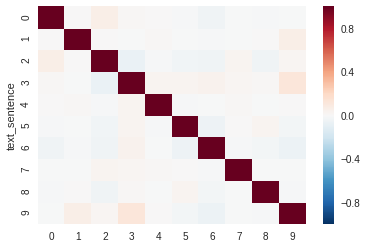

Key:
0 s-,
1 In particular, with positive feedback loops, the process might diverge and yield unrealistically high event rates.
2 This method provides theoretical support for engineering application by carrying out finite element analysis with computers.n
3 Their efficient hunting involves the use of specialised foraging techniques which employ brief short-distance pursuit and/or rapid neck extension to capture prey that is visually detected or flushed only at short range.
4 Approaches by humans on foot resulted in a greater probability of flight than those in a vehicle.
5 The governing partial differential equations even after employing the boundary layer approximations are non linear.
6 Methodology:
7 Our novel transcutaneous CO application facilitated an O dissociation from Hb in the human body, thus providing evidence of the Bohr effect in vivo.
8 () could also have detected whether life on Earth had three-dimensional structure, based on the Galileo space probe data.
9 This finding

In [82]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_idf_train_lsa) * np.asmatrix(X_idf_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_index).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

Using Mean shift method for clustering

In [83]:
bandwidth = estimate_bandwidth(x_idf, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(x_idf)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 5


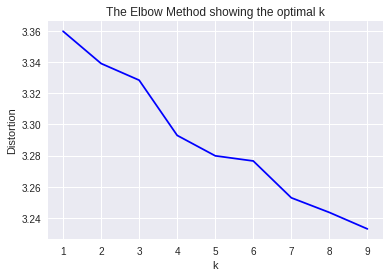

In [84]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x_idf)
    kmeanModel.fit(x_idf)
    distortions.append(sum(np.min(cdist(x_idf, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x_idf.shape[0])
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Optimal Clusters may be 7

#Conclusion:

We tried different methods of modelling using manual feature engineering, Bag of Words and TF-IDF. Our feature engineering turned out to be bad for modeling with scores averaging in 20%s. But as soon as we switched to Bag of Words, the same models provided exciting results between 50%-60%, where the Logistic Regression out performed all others. The highest improvements in scores were when we used the TF-IDF method and performed modelling. Here our Logistic Regression was highest ever for this dataset at 68%. We saw that all in all the optimal number of clusters were around 4 to 5. 

So I would choose Logistic Regressionon TF-IDF method as the best model for this particular dataset.